### Here part 2 for dealing with missing values.

In [1]:
import numpy as np
import pandas as pd
import os
import missingno as msno

In [2]:
os.getcwd()
os.chdir("C:\\Users\\Jacco Bruin .LAPTOP-ACFSBHIL\\THESIS")

In [3]:
df1 = pd.read_csv('dataset_edition(1).csv')

In [6]:
df1 = df1.iloc[: , 1:]  # run this to delete the first columns, since it is a irrelevant index column

In [7]:
df1.describe()   

,year,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,Return on Assets,Free Cash Flow to Net Income,...,Inflation: percent change in the Consumer Price Index,Unemployment rate,Net portfolio equity inflows,Economic growth forecast,Inflation forecast,Unemployment rate forecast,Political stability index (-2.5 weak; 2.5 strong),Interest rates on bank credit to the private sector,Open,profit/loss
count,7744.000000,7.722000e+03,6.658000e+03,7.530000e+03,7599.000000,7728.000000,7727.000000,7742.000000,7743.000000,7530.000000,...,7744.000000,7744.000000,7744.000000,7744.000000,7744.000000,7744.000000,7744.000000,7744.000000,7.571000e+03,6927.00000
mean,2015.000000,5.796669e+08,2.044969e+09,3.806086e+08,0.419893,-1.899527,-2.140409,-6.198022,-0.148914,3.956858,...,1.718182,6.417273,99476.453636,1.737273,1.728182,6.393636,0.434545,3.712727,1.967820e+04,inf
std,3.162482,1.498154e+09,5.070221e+09,1.434546e+09,0.233571,70.096986,77.736972,544.372071,13.593750,130.545151,...,0.744504,2.041571,254277.912456,1.679248,0.682430,2.020393,0.214844,0.698252,9.847302e+05,NaN
min,2010.000000,-8.051000e+09,1.600000e+03,-1.282100e+10,-1.973350,-4198.857140,-4839.028570,-47897.554320,-1195.901150,-1818.321730,...,0.100000,3.670000,-244072.010000,-3.410000,0.520000,3.680000,-0.020000,3.250000,7.000000e-02,-1.00000
25%,2012.000000,3.388913e+07,9.258675e+07,9.106250e+06,0.250730,0.033058,0.003535,0.006420,0.003095,0.447383,...,1.300000,4.360000,-139700.990000,1.670000,1.320000,4.350000,0.290000,3.250000,1.311000e+01,0.03620
50%,2015.000000,2.076010e+08,5.612950e+08,1.295640e+08,0.384050,0.091000,0.048680,0.097355,0.041170,1.556735,...,1.600000,6.170000,149634.010000,2.280000,1.820000,6.160000,0.440000,3.260000,2.931000e+01,0.71490
75%,2018.000000,5.845368e+08,1.801919e+09,4.510000e+08,0.578050,0.159670,0.098160,0.181915,0.080525,2.363400,...,2.100000,8.310000,178952.990000,2.710000,2.170000,8.110000,0.630000,4.100000,5.619000e+01,2.16555
max,2020.000000,3.554400e+10,1.049510e+11,3.599900e+10,1.055500,0.804950,10.418670,81.506030,1.719970,8204.000000,...,3.200000,9.630000,725723.970000,2.920000,3.090000,9.610000,0.680000,5.280000,5.958750e+07,inf


In [8]:
df1_uni = np.unique(df1["Ticker_x"])
len(df1_uni)   # 704 companies left in this dataset

704

In [ ]:
#notice that for profit/loss nothing is missing. But difference between 2010 and 2010 is ofcourse 0. Thats why it looks like a lot of data is missing

<AxesSubplot:>

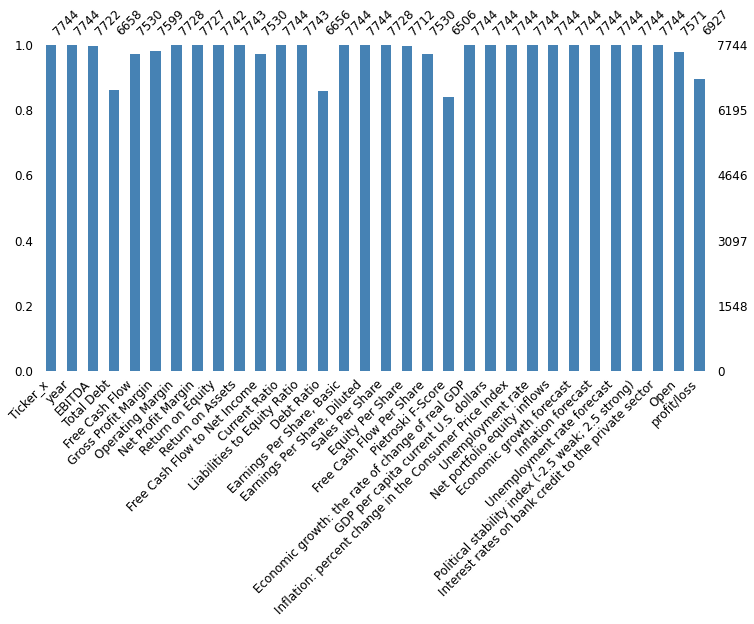

In [13]:
msno.bar(df1, figsize=(12, 6), fontsize=12, color='steelblue')   #check how many missing values

7744


6094

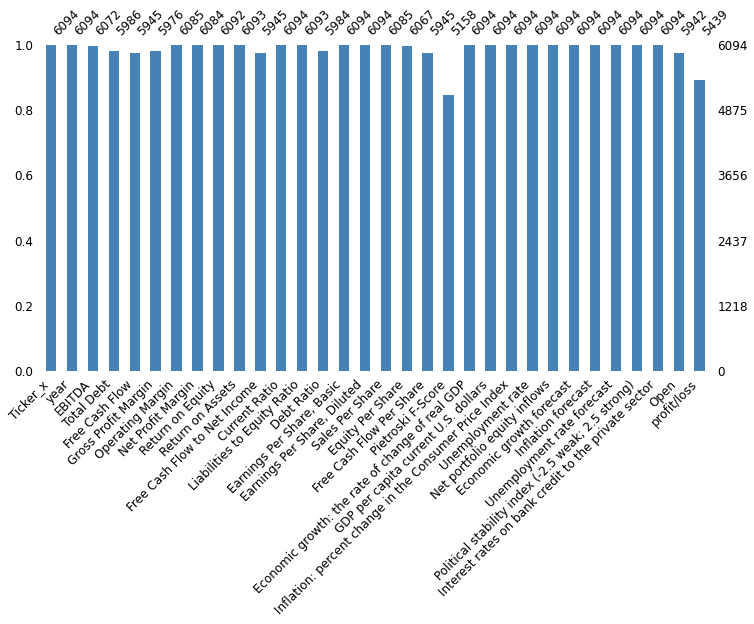

In [9]:
data = pd.DataFrame()
print(len(df1))
for i in df1_uni:
    x = df1[df1["Ticker_x"] == i]
    y = x["Total Debt"].isna().sum()
    if y < 3:                              #if a company has three or more missing datapoints for total debt, the company is not selected 
        data = pd.concat([data, x])

msno.bar(data, figsize=(12, 6), fontsize=12, color='steelblue')
len(data)

6094


5830

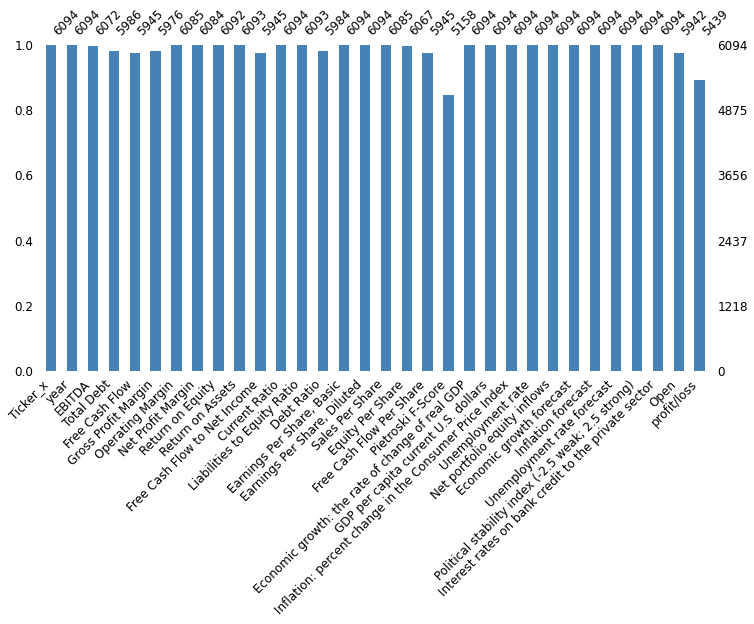

In [10]:
data1 = pd.DataFrame()
data_uni = np.unique(data["Ticker_x"])

print(len(data))
for i in data_uni:
    x = data[data["Ticker_x"] == i]
    y = x["Pietroski F-Score"].isna().sum()
    if y < 3:                                  #if a company has three or more missing datapoints for Pietroski F-score, the company is not selected 
        data1 = pd.concat([data1, x])

msno.bar(data, figsize=(12, 6), fontsize=12, color='steelblue')
len(data1)

In [27]:
data1.to_csv("dataset_edition(2).csv")  # save the results so far 

### I dealt with most of the missing values, but still 45 companies have a few missing values

In [12]:
df2 = pd.read_csv('dataset_edition(2).csv')

In [14]:
df2_uni = np.unique(df2["Ticker_x"])

comp = []
for i in df2_uni:
    x = df2[df2["Ticker_x"] == i]
    y = x["Open"].isna().sum()
    if y > 0:
        comp.append(i)
        
len(comp) # still 45 companies contain of missing values 

45

<AxesSubplot:>

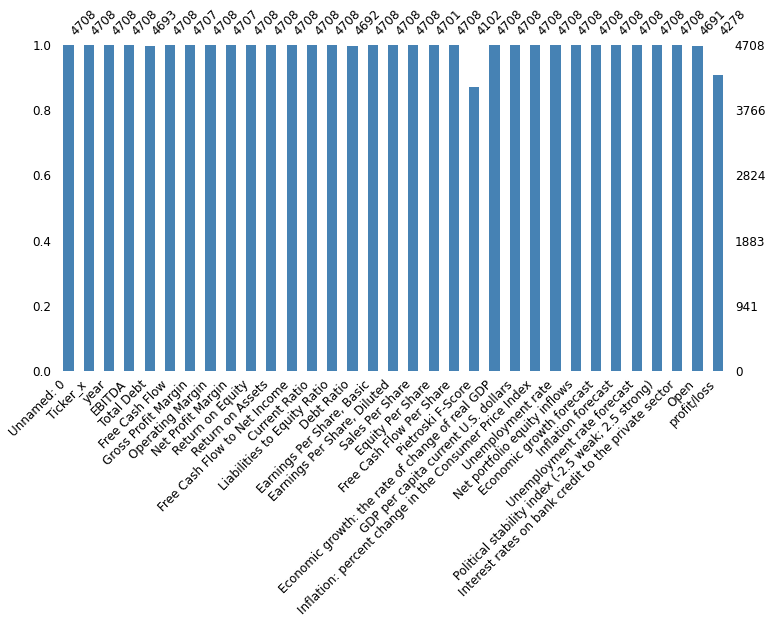

In [15]:
data2 = pd.DataFrame()

for i in df2_uni:
    x = df2[df2["Ticker_x"] == i]
    y = x.isna().sum().sum()
    if y < 5:                              #if a company had 5 or more than 5 missing values in total. The company was not selected. 
        data2 = pd.concat([data2, x]) 

        
len(data2)
msno.bar(data2, figsize=(12, 6), fontsize=12, color='steelblue')

,Unnamed: 0,Ticker_x,year,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,Return on Equity,...,Inflation: percent change in the Consumer Price Index,Unemployment rate,Net portfolio equity inflows,Economic growth forecast,Inflation forecast,Unemployment rate forecast,Political stability index (-2.5 weak; 2.5 strong),Interest rates on bank credit to the private sector,Open,profit/loss
0,0,AAL,2010,1.275000e+09,1.113600e+10,-3.780000e+08,0.23031,0.01389,-0.02124,0.11939,...,1.6,9.63,178952.99,2.71,1.69,9.61,0.44,3.25,9.29,0.0000
1,1,AAL,2011,4.900000e+07,8.220000e+09,-1.067000e+09,0.18237,-0.04325,-0.08253,0.27830,...,3.2,8.95,123357.00,1.55,3.09,8.93,0.59,3.25,5.44,-0.4144
2,2,AAL,2012,1.163000e+09,8.535000e+09,-1.039000e+09,0.20563,0.00595,-0.07548,0.23488,...,2.1,8.07,239066.01,2.28,1.82,8.08,0.63,3.25,10.35,0.1141
3,3,AAL,2013,2.419000e+09,1.679900e+10,-1.297000e+09,0.25943,0.05231,-0.06858,0.67155,...,1.5,7.38,-62642.00,1.84,1.32,7.36,0.64,3.25,18.98,1.0431
4,4,AAL,2014,5.762000e+09,1.772000e+10,-5.650000e+08,0.28150,0.09962,0.06757,1.42603,...,1.6,6.17,154312.00,2.29,0.52,6.16,0.58,3.25,34.72,2.7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,7706,ZEUS,2016,6.164000e+07,1.664240e+08,3.010700e+07,0.14743,0.04003,-0.00102,-0.00425,...,1.3,4.87,-139700.99,1.67,2.18,4.88,0.40,3.51,22.20,-0.0484
5815,7707,ZEUS,2017,8.436200e+07,1.971650e+08,2.680700e+07,0.14132,0.04943,0.01425,0.06957,...,2.1,4.36,149634.01,2.26,2.17,4.35,0.29,4.10,21.99,-0.0574
5816,7708,ZEUS,2018,7.508700e+07,3.025300e+08,-4.061800e+07,0.14260,0.03326,0.01968,0.10997,...,2.4,3.90,156916.01,2.92,1.91,3.89,0.42,4.90,20.96,-0.1016
5817,7709,ZEUS,2019,3.615800e+07,1.929250e+08,1.306630e+08,0.12633,0.01052,0.00244,0.01251,...,1.8,3.67,-244072.01,2.29,2.06,3.68,0.13,5.28,14.49,-0.3789


In [16]:
# the last missing values were filled in with the median.

data2 = data2.replace(np.nan, 0)
data2

xyz = data2["Pietroski F-Score"].replace(0, data2["Pietroski F-Score"].median())
data2["Pietroski F-Score"] = xyz

<AxesSubplot:>

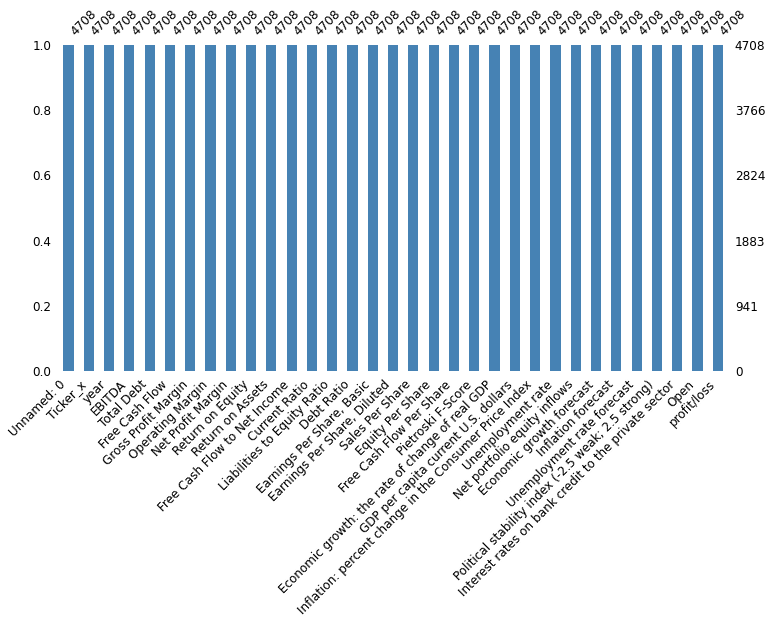

In [17]:
msno.bar(data2, figsize=(12, 6), fontsize=12, color='steelblue')

In [18]:
data2.to_csv("dataset_edition(3)(test_version).csv")

## Be carefull running the following code, i did this mannualy, which took a lot of time 

#### 17 companies missed the opening price 2010. because this was missing, pyhton couldnt calculate the difference between 2010 and 2011. Because all the data was available except the opening price 2010, the values are filled in mannualy.

In [21]:
df1_2 = pd.read_csv('dataset_edition(3)(test_version).csv')

In [22]:
np.isfinite(df1_2.all()).sum()  # number of inf values

34

In [23]:
df1_2_uni = np.unique(df1_2["Ticker_x"])

comp = []
for i in df1_2_uni:
    x = df1_2[df1_2["Ticker_x"] == i]
    y = x["Open"].iloc[0]
    if y == 0:
        comp.append(i)
        
comp # companies that have inf values

['AMCX',
 'BAH',
 'CSOD',
 'FBHS',
 'FLT',
 'GM',
 'HCA',
 'HII',
 'KMI',
 'LPLA',
 'MPC',
 'NLSN',
 'NPTN',
 'SXC',
 'TRGP',
 'WIFI',
 'XYL']

In [24]:
for i in comp:
    x = df1_2[df1_2["Ticker_x"] == i]
    print(x)  # print the data from the companies who have inf values

     Unnamed: 0  Unnamed: 0.1 Ticker_x  year       EBITDA    Total Debt  \
319         330           429     AMCX  2010  384073000.0  1.235065e+09   
320         331           430     AMCX  2011  426124000.0  2.453296e+09   
321         332           431     AMCX  2012  448215000.0  2.326561e+09   
322         333           432     AMCX  2013  503890000.0  2.381478e+09   
323         334           433     AMCX  2014  631116000.0  3.034343e+09   
324         335           434     AMCX  2015  807222000.0  2.991045e+09   
325         336           435     AMCX  2016  839642000.0  3.159974e+09   
326         337           436     AMCX  2017  851273000.0  3.457930e+09   
327         338           437     AMCX  2018  868523000.0  3.479661e+09   
328         339           438     AMCX  2019  873892000.0  3.645927e+09   
329         340           439     AMCX  2020  704545000.0  3.335515e+09   

     Free Cash Flow  Gross Profit Margin  Operating Margin  Net Profit Margin  \
319     149320000.

In [25]:
df1_2.at[1661,"Open"] = 40.74    # replace the value with the value searched on the internet

In [26]:
df1_2[df1_2["Ticker_x"] == "FBHS"]

,Unnamed: 0,Unnamed: 0.1,Ticker_x,year,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,Net Profit Margin,...,Inflation: percent change in the Consumer Price Index,Unemployment rate,Net portfolio equity inflows,Economic growth forecast,Inflation forecast,Unemployment rate forecast,Political stability index (-2.5 weak; 2.5 strong),Interest rates on bank credit to the private sector,Open,profit/loss
1661,2002,2596,FBHS,2010,3.180000e+08,1.680000e+07,2.052000e+08,0.32670,0.06383,0.01973,...,1.6,9.63,178952.99,2.71,1.69,9.61,0.44,3.25,40.74,0.0
1662,2003,2597,FBHS,2011,1.930000e+08,4.068000e+08,9.070000e+07,0.29938,0.02448,-0.01070,...,3.2,8.95,123357.00,1.55,3.09,8.93,0.59,3.25,12.00,inf
1663,2004,2598,FBHS,2012,2.624000e+08,3.200000e+08,2.116000e+08,0.33227,0.05139,0.03787,...,2.1,8.07,239066.01,2.28,1.82,8.08,0.63,3.25,27.02,inf
1664,2005,2599,FBHS,2013,4.374000e+08,3.500000e+08,3.739000e+08,0.34969,0.09369,0.06202,...,1.5,7.38,-62642.00,1.84,1.32,7.36,0.64,3.25,41.60,inf
1665,2006,2600,FBHS,2014,5.093000e+08,6.700000e+08,3.679000e+08,0.34057,0.10228,0.03939,...,1.6,6.17,154312.00,2.29,0.52,6.16,0.58,3.25,41.34,inf
1666,2007,2601,FBHS,2015,6.278000e+08,1.168700e+09,6.134000e+08,0.34544,0.11196,0.06879,...,0.1,5.28,-187306.00,2.71,0.70,5.28,0.68,3.26,47.51,inf
1667,2008,2602,FBHS,2016,7.693000e+08,1.431100e+09,8.954000e+08,0.36201,0.12971,0.08289,...,1.3,4.87,-139700.99,1.67,2.18,4.88,0.40,3.51,57.79,inf
1668,2009,2603,FBHS,2017,8.363000e+08,1.507600e+09,7.841000e+08,0.36578,0.13363,0.08945,...,2.1,4.36,149634.01,2.26,2.17,4.35,0.29,4.10,67.26,inf
1669,2010,2604,FBHS,2018,8.315000e+08,2.334000e+09,7.903000e+08,0.35722,0.12432,0.07103,...,2.4,3.90,156916.01,2.92,1.91,3.89,0.42,4.90,52.97,inf
1670,2011,2605,FBHS,2019,9.074000e+08,2.184300e+09,8.378000e+08,0.35604,0.13092,0.07492,...,1.8,3.67,-244072.01,2.29,2.06,3.68,0.13,5.28,55.09,inf


In [27]:
data.to_csv("dataset_edition(4)(test_version)(nomissingvalues.csv")

### This is the final dataset. This dataset will be split into three datasets: 6_year_dataset, 3_year_dataset, and 1_year_dataset. How this is done, is shown in the files: build_dataset_6_years, build_dataset_3_years, and build_dataset_1_year.